### Loading the dataset (10 classes out of 101) ###

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip # homepage

import zipfile

file_zip = zipfile.ZipFile('10_food_classes_all_data.zip')
file_zip.extractall()
file_zip.close()

--2023-06-16 08:11:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.250.4.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.7MB/s    in 23s     

2023-06-16 08:11:30 (21.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### Exploring the Dataset ###

In [ ]:
import os
import pathlib

# Check class names
path = pathlib.Path('10_food_classes_all_data/train')
class_names = [item.name for item in path.glob('*')]
print(class_names)

['chicken_curry', 'ice_cream', 'sushi', 'hamburger', 'fried_rice', 'chicken_wings', 'steak', 'grilled_salmon', 'ramen', 'pizza']


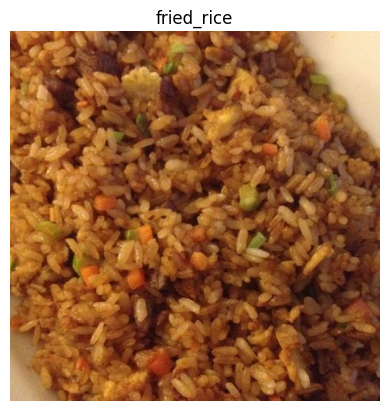

In [ ]:
# Plot random image
import matplotlib.pyplot as plt
import matplotlib.image as img
import random

path = '10_food_classes_all_data/train'
random_category = random.choice(os.listdir(path))
random_image_path = random.choice(os.listdir(path + '/' + random_category))

random_image_path_full = path + '/' + random_category + '/' + random_image_path

random_image = img.imread(random_image_path_full)

plt.figure()
plt.imshow(random_image)
plt.title(random_category)
plt.axis('off')
plt.show()

### Preparing training and testing datasets ###

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_directory = '10_food_classes_all_data/train'
test_directory = '10_food_classes_all_data/test'

train_dataset = image_dataset_from_directory(
    directory = train_directory,
    batch_size = 32,
    image_size = (224, 224),
    label_mode = 'categorical',
    shuffle = True
)
test_dataset =  image_dataset_from_directory(
    directory = test_directory,
    batch_size = 32,
    image_size = (224, 224),
    label_mode = 'categorical',
    shuffle = False
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Creating preprocessing layer ###

In [ ]:
# May consider data augmentation layers in the future
preprocessing_layer = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale = 1./255)
])

### Re-creating TinyVGG architecture ###

In [ ]:
TinyVGG = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape = (224, 224, 3),
                           filters = 10,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'valid',
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'valid',
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'valid',
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = (3,3),
                           strides = (1,1),
                           padding = 'valid',
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax')

])

### Building the model ###

In [ ]:
model = tf.keras.models.Sequential([
    preprocessing_layer,
    TinyVGG
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ['accuracy'])

# Creating EarlyStopping callback
stop = tf.keras.callbacks.EarlyStopping(patience = 3, monitor = 'accuracy')

history = model.fit(train_dataset,
                    epochs = 4,
                    validation_data = test_dataset,
                    steps_per_epoch = len(train_dataset),
                    validation_steps = len(test_dataset),
                    callbacks = [stop])

Epoch 1/5
235/235 [==============================] - 24s 94ms/step - loss: 2.1223 - accuracy: 0.2295 - val_loss: 1.9791 - val_accuracy: 0.3068
Epoch 2/5
235/235 [==============================] - 22s 91ms/step - loss: 1.8650 - accuracy: 0.3536 - val_loss: 1.9629 - val_accuracy: 0.3108
Epoch 3/5
235/235 [==============================] - 22s 92ms/step - loss: 1.5340 - accuracy: 0.4748 - val_loss: 2.0100 - val_accuracy: 0.3160
Epoch 4/5
235/235 [==============================] - 22s 88ms/step - loss: 1.0516 - accuracy: 0.6493 - val_loss: 2.5447 - val_accuracy: 0.2976
Epoch 5/5
235/235 [==============================] - 24s 99ms/step - loss: 0.5568 - accuracy: 0.8209 - val_loss: 3.3764 - val_accuracy: 0.2592


### Plotting loss and accuracy ###

<Axes: >

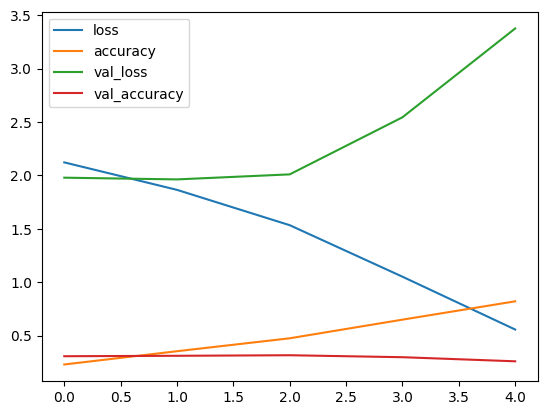

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

#### The model starts to overfit very quickly. Consider regularization techniques in the future ####